In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime
import re
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
#lee el archivo separando en lineas.
datos_temp_min = []
with open('195134_BUENOS_AIRES_OBSERVATORIO_temp_min.txt', encoding='iso-8859-1') as fname:
	lineas = fname.readlines()
	for linea in lineas:
		datos_temp_min.append(linea.strip('\n'))

In [3]:
datos_temp_max = []
with open('195134_BUENOS_AIRES_OBSERVATORIO_temp_max.txt', encoding='iso-8859-1') as fname:
	lineas = fname.readlines()
	for linea in lineas:
		datos_temp_max.append(linea.strip('\n'))

In [4]:
def read_txt_temp_min(data,year_i,year_f):
    datos = []
    with open(data, encoding='iso-8859-1') as fname:
	    lineas = fname.readlines()
	    for linea in lineas:
		    datos.append(linea.strip('\n'))
    years = range(year_i,year_f,1) 
    
    fechas = []
    temps_min = []

    #Barremos los anios
    for y in years :
    
        indice = datos.index(f'Año {y} Temperatura Mínima (°C)')
        indice_sig = datos.index(f'Año {y+1} Temperatura Mínima (°C)')
    
    #Barremos los dias
        for d in range(indice+4,indice_sig-2,1):
            d2 = datos[d]
            d2= re.sub(r" ", "",d2).split(";")
            
            dia = int(d2[0])
    # Barremos los meses    
            for m in range(len(d2)-2):               

                try:
                    fecha = date(day=dia, month=m+1, year=y)
                    fechas.append(fecha)                    
                    temp_min = d2[m+1]
                    if (d2[m+1] == 's/d'):
                        #print('no existe')
                        temp_min = float('nan')
                    else:
                        temp_min = float(d2[m+1].replace(',','.'))
                    temps_min.append(temp_min) 
                except ValueError as error_in_date:
                    pass
                

    df = pd.DataFrame()
    df['Fecha']= fechas
    df['temp_min']=temps_min
    df = df.sort_values(by='Fecha')
    df = df.set_index('Fecha')
    return df

In [5]:
def read_txt_temp_max(data,year_i,year_f):
    datos = []
    with open(data, encoding='iso-8859-1') as fname:
	    lineas = fname.readlines()
	    for linea in lineas:
		    datos.append(linea.strip('\n'))
    years = range(year_i,year_f,1) 
    
    fechas = []
    temps_min = []

    #Barremos los anios
    for y in years :
    
        indice = datos.index(f'Año {y} Temperatura Máxima (°C)')
        indice_sig = datos.index(f'Año {y+1} Temperatura Máxima (°C)')
    
    #Barremos los dias
        for d in range(indice+4,indice_sig-2,1):
            d2 = datos[d]
            d2= re.sub(r" ", "",d2).split(";")
            
            dia = int(d2[0])
    # Barremos los meses    
            for m in range(len(d2)-2):               

                try:
                    fecha = date(day=dia, month=m+1, year=y)
                    fechas.append(fecha)                    
                    temp_min = d2[m+1]
                    if (d2[m+1] == 's/d'):
                        #print('no existe')
                        temp_min = float('nan')
                    else:
                        temp_min = float(d2[m+1].replace(',','.'))
                    temps_min.append(temp_min) 
                except ValueError as error_in_date:
                    pass
                

    df = pd.DataFrame()
    df['Fecha']= fechas
    df['temp_max']=temps_min
    df = df.sort_values(by='Fecha')
    df = df.set_index('Fecha')
    return df

In [6]:
df_temp_min = read_txt_temp_min('195134_BUENOS_AIRES_OBSERVATORIO_temp_min.txt',1909,2021)
df_temp_max = read_txt_temp_max('195134_BUENOS_AIRES_OBSERVATORIO_temp_max.txt',1909,2021)

In [7]:
df_temp_min

,temp_min
Fecha,
1909-01-01,18.9
1909-01-02,21.3
1909-01-03,19.1
1909-01-04,18.4
1909-01-05,14.5
...,...
2020-12-27,21.7
2020-12-28,23.5
2020-12-29,22.4


In [8]:
df_temp_max

,temp_max
Fecha,
1909-01-01,26.5
1909-01-02,28.9
1909-01-03,29.1
1909-01-04,26.0
1909-01-05,26.6
...,...
2020-12-27,30.0
2020-12-28,31.9
2020-12-29,32.4


In [9]:
df_temp_min.index = pd.to_datetime(df_temp_min.index)
df_temp_max.index = pd.to_datetime(df_temp_max.index)

In [10]:
df_temp_min.groupby(pd.PeriodIndex(df_temp_min.index, freq="M"))['temp_min'].mean()
df_temp_max.groupby(pd.PeriodIndex(df_temp_max.index, freq="M"))['temp_max'].mean()

Fecha
1909-01    28.929032
1909-02    26.560714
1909-03    25.329032
1909-04    23.153333
1909-05    17.916129
             ...    
2020-08    19.038710
2020-09    19.346667
2020-10    22.096774
2020-11    26.503333
2020-12    28.987097
Freq: M, Name: temp_max, Length: 1344, dtype: float64

In [11]:
df=pd.concat([df_temp_min,df_temp_max],axis=1)

In [12]:
df

,temp_min,temp_max
Fecha,,
1909-01-01,18.9,26.5
1909-01-02,21.3,28.9
1909-01-03,19.1,29.1
1909-01-04,18.4,26.0
1909-01-05,14.5,26.6
...,...,...
2020-12-27,21.7,30.0
2020-12-28,23.5,31.9
2020-12-29,22.4,32.4


In [13]:
df['temp_avg']=(df.temp_max+df.temp_min)/2

In [14]:
df

,temp_min,temp_max,temp_avg
Fecha,,,
1909-01-01,18.9,26.5,22.70
1909-01-02,21.3,28.9,25.10
1909-01-03,19.1,29.1,24.10
1909-01-04,18.4,26.0,22.20
1909-01-05,14.5,26.6,20.55
...,...,...,...
2020-12-27,21.7,30.0,25.85
2020-12-28,23.5,31.9,27.70
2020-12-29,22.4,32.4,27.40


In [15]:
df[df['temp_avg'].isna()]

,temp_min,temp_max,temp_avg
Fecha,,,
1955-12-31,NaN,24.1,NaN
1958-04-01,NaN,NaN,NaN
1986-05-05,NaN,20.6,NaN
1986-07-01,3.3,NaN,NaN
1986-07-02,5.4,NaN,NaN
1986-07-03,9.4,NaN,NaN
1986-07-04,9.0,NaN,NaN
1986-07-05,6.4,NaN,NaN
1986-07-06,5.7,NaN,NaN


In [16]:
df.reset_index(inplace=True)

In [17]:
df.head()

,Fecha,temp_min,temp_max,temp_avg
0,1909-01-01,18.9,26.5,22.70
1,1909-01-02,21.3,28.9,25.10
2,1909-01-03,19.1,29.1,24.10
3,1909-01-04,18.4,26.0,22.20
4,1909-01-05,14.5,26.6,20.55


In [18]:
df['Year'] = pd.DatetimeIndex(df['Fecha']).year
df.head()

,Fecha,temp_min,temp_max,temp_avg,Year
0,1909-01-01,18.9,26.5,22.70,1909
1,1909-01-02,21.3,28.9,25.10,1909
2,1909-01-03,19.1,29.1,24.10,1909
3,1909-01-04,18.4,26.0,22.20,1909
4,1909-01-05,14.5,26.6,20.55,1909


In [19]:
df['Month'] = pd.DatetimeIndex(df['Fecha']).month
df.head()

,Fecha,temp_min,temp_max,temp_avg,Year,Month
0,1909-01-01,18.9,26.5,22.70,1909,1
1,1909-01-02,21.3,28.9,25.10,1909,1
2,1909-01-03,19.1,29.1,24.10,1909,1
3,1909-01-04,18.4,26.0,22.20,1909,1
4,1909-01-05,14.5,26.6,20.55,1909,1


In [20]:
df_agrupado = df.groupby(['Year', 'Month'], as_index=False).mean()

In [21]:
df_agrupado.head()

,Year,Month,temp_min,temp_max,temp_avg
0,1909,1,17.422581,28.929032,23.175806
1,1909,2,16.000000,26.560714,21.280357
2,1909,3,13.012903,25.329032,19.170968
3,1909,4,11.850000,23.153333,17.501667
4,1909,5,4.441935,17.916129,11.179032


In [22]:
df_agrupado[df_agrupado['temp_avg'].isna()]

,Year,Month,temp_min,temp_max,temp_avg
930,1986,7,8.2,NaN,NaN


In [23]:
df_agrupado.dropna(inplace=True)

,Year,Month,temp_min,temp_max,temp_avg
0,1909,1,17.422581,28.929032,23.175806
1,1909,2,16.000000,26.560714,21.280357
2,1909,3,13.012903,25.329032,19.170968
3,1909,4,11.850000,23.153333,17.501667
4,1909,5,4.441935,17.916129,11.179032
...,...,...,...,...,...
1339,2020,8,9.216129,19.038710,14.127419
1340,2020,9,9.800000,19.346667,14.573333
1341,2020,10,12.387097,22.096774,17.241935
1342,2020,11,17.353333,26.503333,21.928333


([<matplotlib.axis.YTick at 0x13118b09f60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

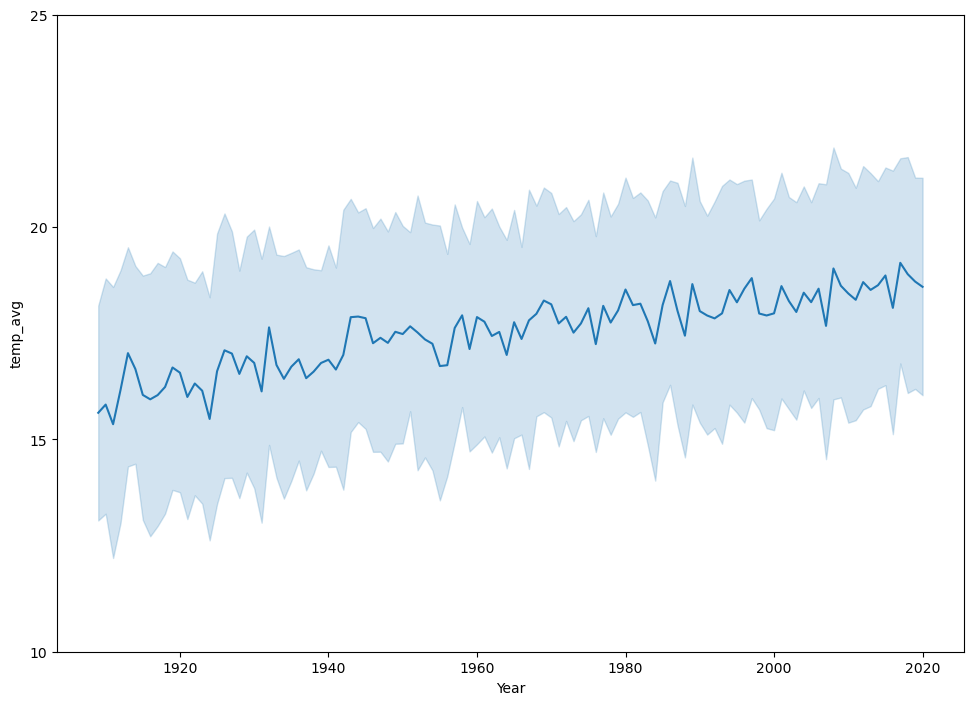

In [24]:


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x='Year' ,y='temp_avg', data=df_agrupado, markers=True, dashes=False)


plt.yticks([10, 15, 20, 25])

In [25]:
df_wide = df_agrupado.pivot("Year", "Month", "temp_avg")
df_wide.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1909,23.175806,21.280357,19.170968,17.501667,11.179032,8.413333,9.593548,12.490323,13.583333,14.629032,16.561667,19.958065
1910,23.275806,20.978571,18.188710,15.695000,11.938710,10.771667,8.554839,10.877419,12.420000,15.351613,19.150000,22.658065
1911,23.574194,21.825000,19.398387,15.866667,12.933871,7.946667,9.295161,9.483871,10.446667,14.248387,18.508333,20.783871
1912,23.516129,22.798276,21.127419,15.918333,12.483871,10.231667,8.756452,9.362903,12.755000,16.498387,17.790000,22.753226
1913,22.883871,25.601786,19.230645,18.436667,14.887097,10.116667,12.606452,11.633871,13.195000,15.585484,19.205000,21.014516


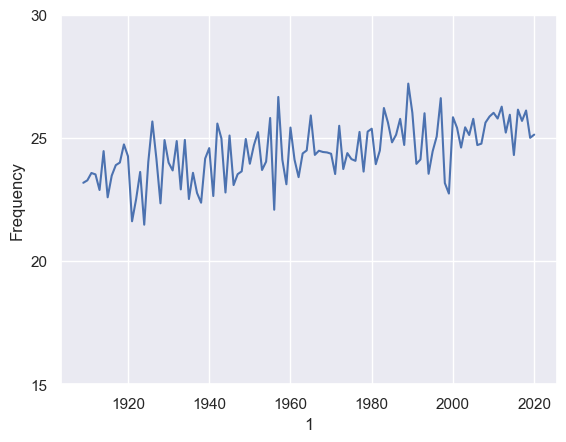

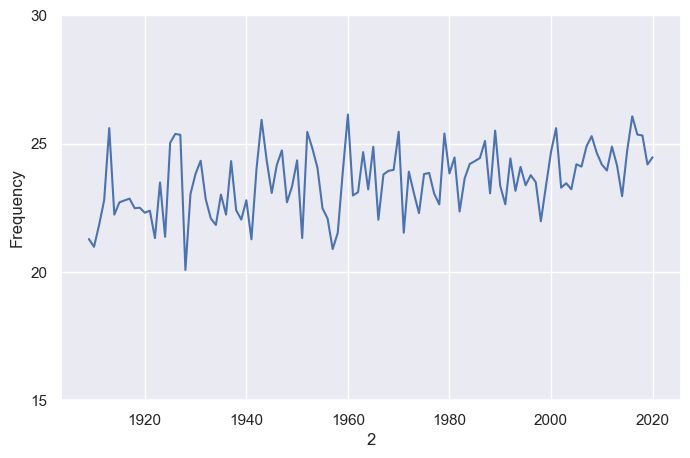

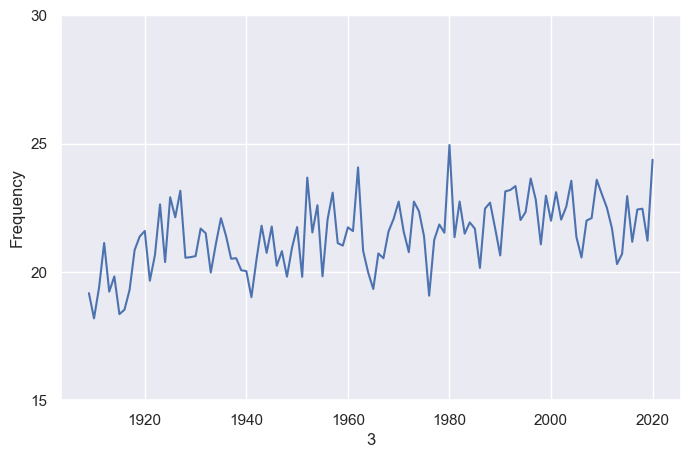

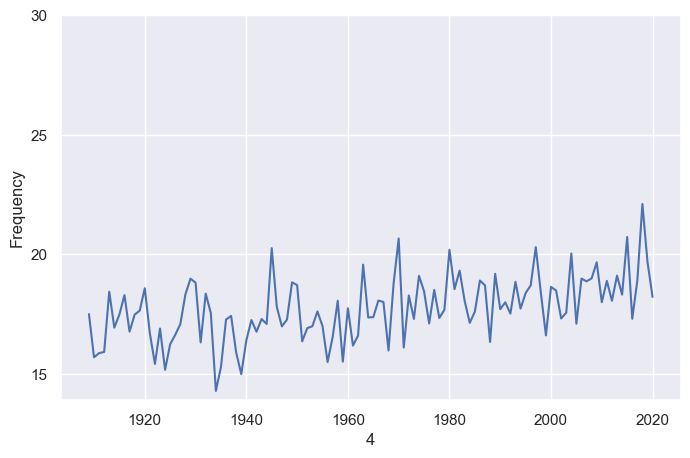

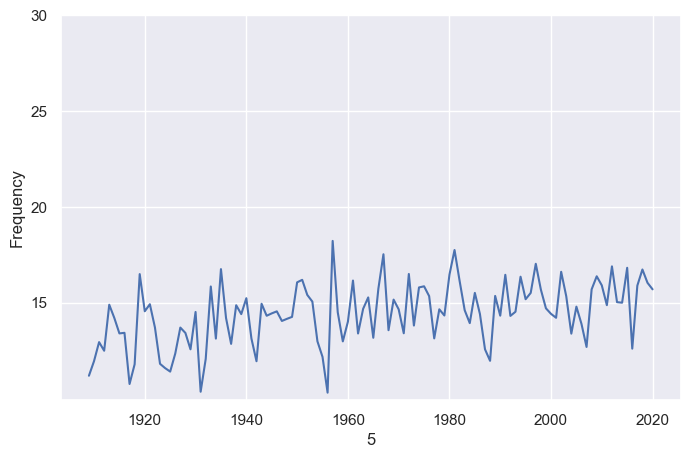

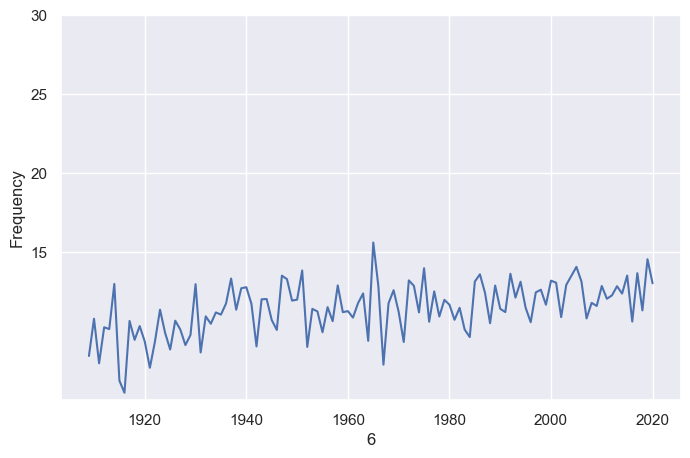

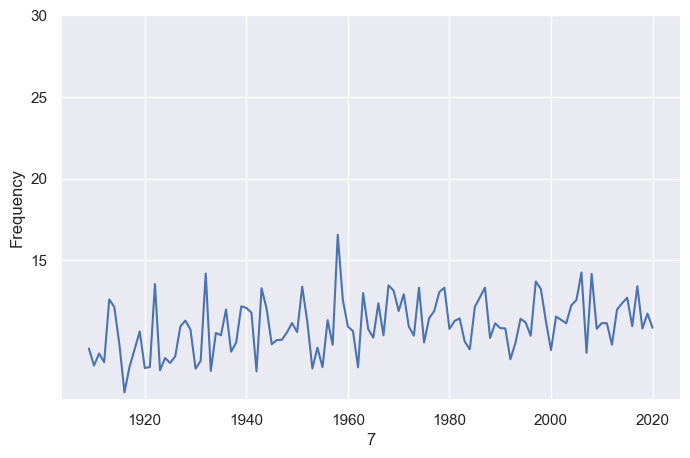

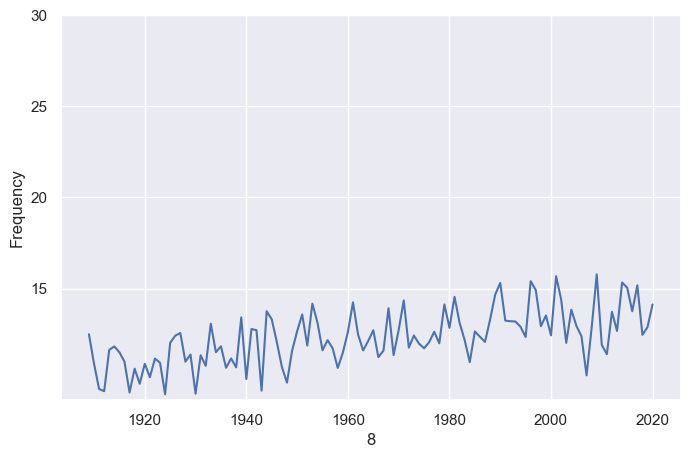

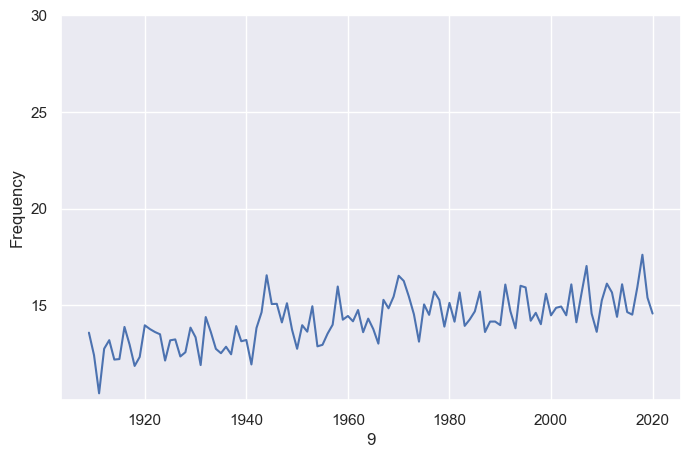

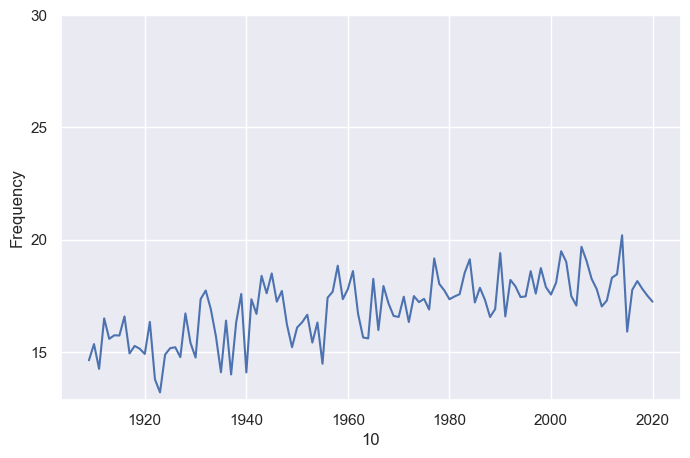

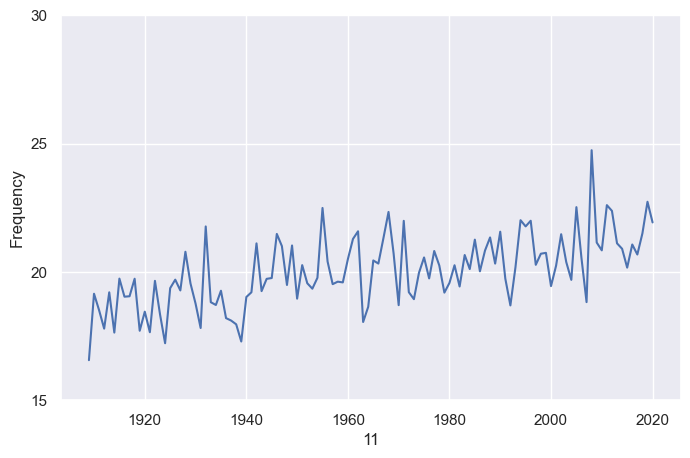

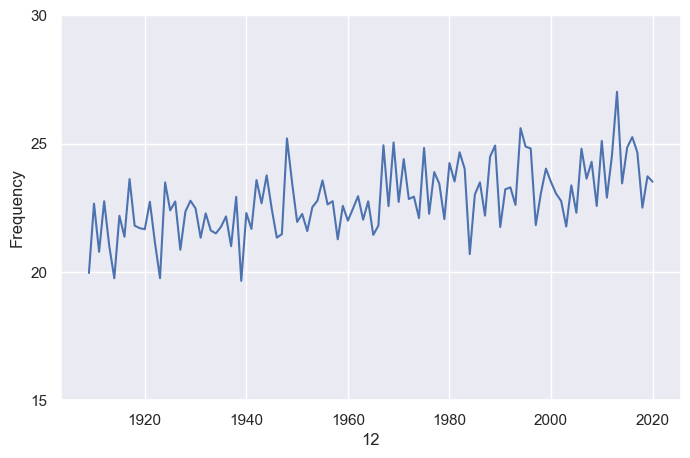

In [26]:
# a for loop to automate our task--------------
for i in df_wide.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.lineplot(x= 'Year', y= i ,data=df_wide)
    plt.yticks([15, 20, 25 , 30])

In [34]:
np.isfinite(df_agrupado['temp_avg'])

0       True
1       True
2       True
3       True
4       True
        ... 
1339    True
1340    True
1341    True
1342    True
1343    True
Name: temp_avg, Length: 1344, dtype: bool

In [37]:
df_agrupado[df_agrupado.index.isin(np.isfinite(df_agrupado[['temp_avg']]).query('not temp_avg').index)]

,Year,Month,temp_min,temp_max,temp_avg
930,1986,7,8.2,NaN,NaN


In [30]:
plt.figure(figsize=(16,10))
decomposition = sm.tsa.seasonal_decompose(df_agrupado.temp_avg, model='additive')
decomposition.plot()
plt.show()

ValueError: This function does not handle missing values

<Figure size 1600x1000 with 0 Axes>